In [ ]:
##########################################
##### Install the relevant packages #####
##########################################
#This will take several minutes

if (!requireNamespace("BiocManager", quietly = TRUE)) #Install bioconductor, repository of bioinformatics packages in R
    install.packages("BiocManager")

BiocManager::install("edgeR"); #Install the EdgeR package
install.packages("gplots");
install.packages("ggplot2");
install.packages('ape');
library(edgeR);
library(gplots);
library(ggplot2);
library(ape);

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'BiocVersion', 'edgeR'

also installing the dependencies ‘limma’, ‘locfit’


Old packages: 'cpp11', 'data.table', 'desc', 'diffobj', 'digest', 'hms',
  'knitr', 'lifecycle', 'mime', 'openssl', 'pillar', 'rcmdcheck', 'readr',
  'remotes', 'stringi', 'testthat', 'tibble', 'tidyr', 'tinytex', 'mgcv',
  'nlme'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: limma


Attac

In [ ]:
speciesListDF = read.csv(file="https://www.andrew.cmu.edu/user/apfennin/2021_Fall_GEB/project/zoonomiaSpeciesList.txt", sep = "\t",header=T);

In [ ]:
speciesList = colnames(speciesListDF)
speciesList = speciesList[2:length(speciesList)]
speciesList[1:5]

[1] "Acinonyx_jubatus"       "Acomys_cahirinus"       "Ailuropoda_melanoleuca"
[4] "Ailurus_fulgens"        "Allactaga_bullata"

In [ ]:
speciesInfoDF = read.csv(file = "https://www.andrew.cmu.edu/user/apfennin/2021_Fall_GEB/hw2/ZoonomiaGenomeInfo_3.csv", header = T,stringsAsFactors=F, encoding = "latin1")
rownames(speciesInfoDF) <- speciesInfoDF$Species
speciesInfoDF = speciesInfoDF[speciesList,]

In [ ]:
# speciesInfoDF is not ordered in the same order as speciesList
# Now pulling out target species
targetSpecies = c("Eulemur_flavifrons", "Propithecus_coquereli", "Microcebus_murinus", "Nomascus_leucogenys","Homo_sapiens","Piliocolobus_tephrosceles")
targetSpeciesInfoDF = speciesInfoDF[targetSpecies,]

In [ ]:
targetSpeciesInfoDF$SocialGroupSize = c(1, 9.15, 5, 8.55, 5.75, 4)
targetSpeciesInfoDF

,ZoonomiaIndex,Species,CommonName,Clade,MouseSplit_Cactus,MouseSplit_MYA,HumanSplit_MYA,CN50_kb,Scaffold.N50,Scaffold.L50,Contig.N50,Contig.L50,Assembly,SocialGroupSize
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Eulemur_flavifrons,48,Eulemur_flavifrons,Blue-eyed Black Lemur,Euarchonta,0.81823,90,74.10,27331,413352,1495,27331,22560,GCA_001262665.1,1.00
Propithecus_coquereli,103,Propithecus_coquereli,CoquerelÕs Sifaka,Euarchonta,0.82002,90,74.10,28129,5604909,149,28129,18523,GCF_000956105.1,9.15
Microcebus_murinus,70,Microcebus_murinus,Gray Mouse Lemur,Euarchonta,0.83035,90,74.10,210702,108171978,10,210702,2987,GCA_000165445.3,5.00
Nomascus_leucogenys,84,Nomascus_leucogenys,Northern White-cheeked Gibbon,Euarchonta,0.73678,90,19.80,35148,52956880,21,35148,21558,GCF_000146795.2,8.55
Homo_sapiens,55,Homo_sapiens,Human,Euarchonta,0.73560,90,0.00,56413054,67794873,16,56413054,19,GCA_000001405.27,5.75
Piliocolobus_tephrosceles,101,Piliocolobus_tephrosceles,Ugandan Red Colobus,Euarchonta,0.75168,90,28.81,70213,10172280,82,70213,11545,GCA_002776525.1,4.00


In [ ]:
zoonomiaTree = read.tree("https://www.andrew.cmu.edu/user/apfennin/2021_Fall_GEB/hw2/Zoonomia_ChrX_lessGC40_241species_30Consensus.tree")

removeSpecV <- setdiff(zoonomiaTree$tip.label,targetSpecies); #The set of species to remove from the tree
filteredZoonomiaTree = drop.tip(zoonomiaTree, removeSpecV)

targetSpeciesInfoDF$NormalizedSocialGroupSize <- targetSpeciesInfoDF$SocialGroupSize /max(targetSpeciesInfoDF$SocialGroupSize);
tipColorsM <- colorRamp(c("blue","red"),space= "rgb")(targetSpeciesInfoDF[filteredZoonomiaTree$tip.label,"NormalizedSocialGroupSize"])
tipColorsV <- apply(tipColorsM,1,function(x) rgb(x[1],x[2],x[3],maxColorValue=255)); #color ramp (0 = blue - 1 = red, so 0.5 is purple)

In [ ]:
sortedSocialGroupSize = targetSpeciesInfoDF[filteredZoonomiaTree$tip.label[order(tipColorsM[,1])],"SocialGroupSize"]

filteredZoonomiaTree$tip.label = targetSpeciesInfoDF[filteredZoonomiaTree$tip.label, "CommonName"]

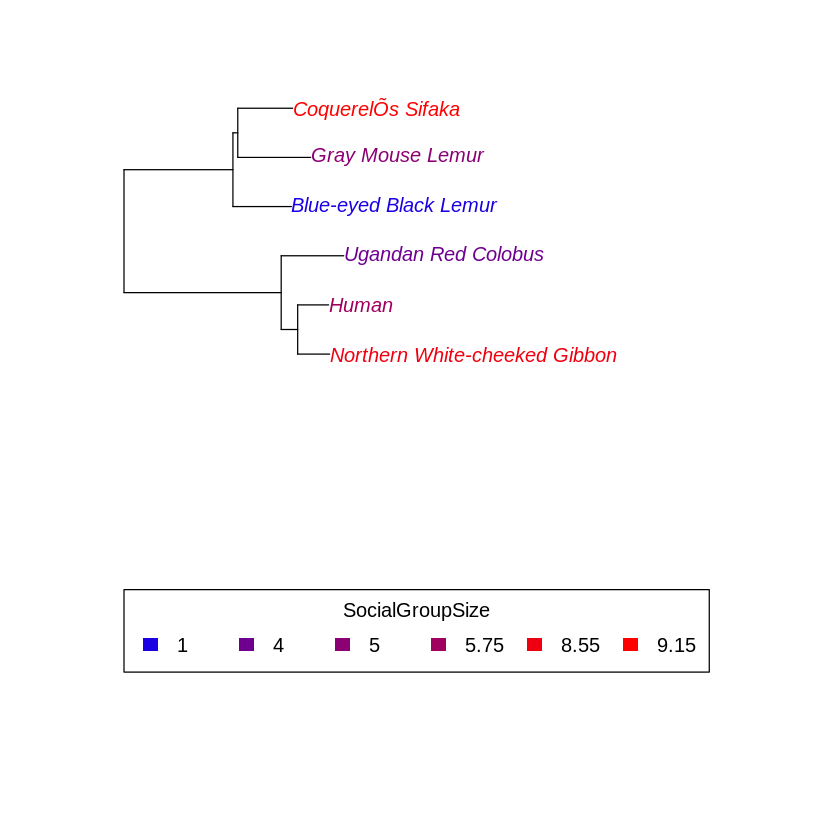

In [ ]:
layout(matrix(c(1,2), 2, 1, byrow = TRUE), heights = c(11, 8))
plot(filteredZoonomiaTree,type = "phylogram", show.tip.label = TRUE,
     edge.color = "black", edge.width = 1, edge.lty = 1,
     tip.color = tipColorsV)
plot.new()
sortedTipColorsM = tipColorsM[order(tipColorsM[,1]),]
sortedTipColorsV = apply(sortedTipColorsM,1,function(x) rgb(x[1],x[2],x[3],maxColorValue=255)); #color ramp (0 = blue - 1 = red, so 0.5 is purple)
legend(x = 0, y = 1,
       legend = sortedSocialGroupSize,
       fill = sortedTipColorsV,
       border = NA,text.font = 0.5,
       horiz = TRUE, title = 'SocialGroupSize')

In [ ]:
speciesUrl <- "http://www.andrew.cmu.edu/user/apfennin/2021_Fall_GEB/hw2/ZoonomiaGenomeInfo_3.csv"; #The the URL of the zoonomia species file
speciesInfoF <- read.csv(file=speciesUrl,stringsAsFactors=F,header=T); #Read the file into a data frame
rownames(speciesInfoF) <- speciesInfoF$Species
speciesInfoF = speciesInfoF[speciesList,]
speciesInfoF[1:5,]
speciesInfoF[targetSpecies,]

,ZoonomiaIndex,Species,CommonName,Clade,MouseSplit_Cactus,MouseSplit_MYA,HumanSplit_MYA,CN50_kb,Scaffold.N50,Scaffold.L50,Contig.N50,Contig.L50,Assembly
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
Acinonyx_jubatus,1,Acinonyx_jubatus,Cheetah,Laurasiatheria,0.77159,96.0,94,35120,3122036,232,35120,19059,GCF_001443585.1
Acomys_cahirinus,122,Acomys_cahirinus,Cairo Spiny Mouse,Glires,0.12066,28.6,89,44337,65411,10134,42476,15859,DISCOVAR (GCA_004027535.1)
Ailuropoda_melanoleuca,2,Ailuropoda_melanoleuca,Giant Panda,Laurasiatheria,0.81346,96.0,94,128604,9947519,75,128604,5279,GCA_002007445.1
Ailurus_fulgens,3,Ailurus_fulgens,Red Panda,Laurasiatheria,0.78542,96.0,94,99577,9947519,75,99577,6772,GCA_002007465.1
Allactaga_bullata,123,Allactaga_bullata,Gobi Jerboa,Glires,0.62434,55.0,89,37276,36308,21056,30651,25318,DISCOVAR (GCA_004027895.1)


Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): input string 3 is invalid in this locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         st

,ZoonomiaIndex,Species,CommonName,Clade,MouseSplit_Cactus,MouseSplit_MYA,HumanSplit_MYA,CN50_kb,Scaffold.N50,Scaffold.L50,Contig.N50,Contig.L50,Assembly
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
Eulemur_flavifrons,48,Eulemur_flavifrons,Blue-eyed Black Lemur,Euarchonta,0.81823,90,74.10,27331,413352,1495,27331,22560,GCA_001262665.1
Propithecus_coquereli,103,Propithecus_coquereli,Coquerels Sifaka,Euarchonta,0.82002,90,74.10,28129,5604909,149,28129,18523,GCF_000956105.1
Microcebus_murinus,70,Microcebus_murinus,Gray Mouse Lemur,Euarchonta,0.83035,90,74.10,210702,108171978,10,210702,2987,GCA_000165445.3
Nomascus_leucogenys,84,Nomascus_leucogenys,Northern White-cheeked Gibbon,Euarchonta,0.73678,90,19.80,35148,52956880,21,35148,21558,GCF_000146795.2
Homo_sapiens,55,Homo_sapiens,Human,Euarchonta,0.73560,90,0.00,56413054,67794873,16,56413054,19,GCA_000001405.27
Piliocolobus_tephrosceles,101,Piliocolobus_tephrosceles,Ugandan Red Colobus,Euarchonta,0.75168,90,28.81,70213,10172280,82,70213,11545,GCA_002776525.1


[1] NA NA NA NA NA NA

[1] "Blue-eyed Black Lemur"         "Ugandan Red Colobus"          
[3] "Gray Mouse Lemur"              "Human"                        
[5] "Northern White-cheeked Gibbon" "CoquerelÕs Sifaka"